In [20]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cmocean.cm as cmo
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import pandas as pd

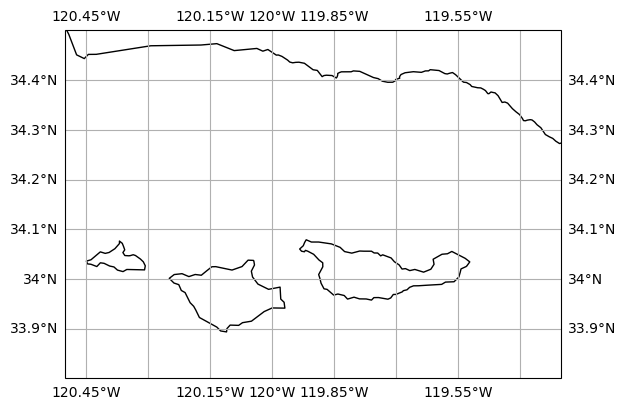

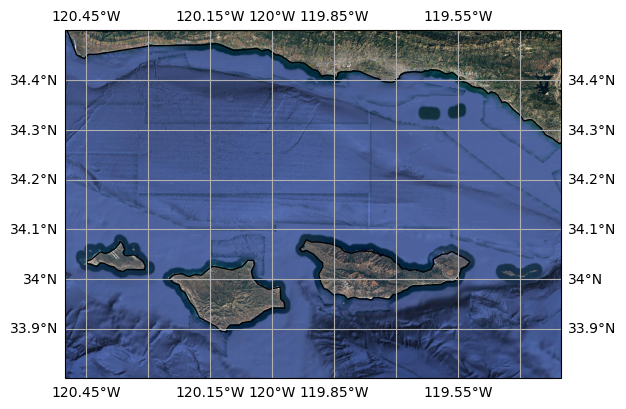

In [21]:
# map extent for SBC
extent = [-120.5, -119.3, 34.5, 33.8]
plt.figure()
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines()
gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.set_extent(extent,crs=ccrs.PlateCarree())
request= cimgt.GoogleTiles(style='satellite')

plt.figure()
ax = plt.axes(projection=ccrs.Mercator())

ax.coastlines()
ax.add_image(request, 12)

gl= ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
ax.set_extent(extent,crs=ccrs.PlateCarree())

In [22]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [23]:
df = pd.read_csv('density.csv')
df_s = pd.read_csv('size.csv')

In [24]:
# Package ID: knb-lter-sbc.145.1 Cataloging System:https://pasta.edirepository.org.
# Data set title: SBC LTER: Sea urchin foraging rates on giant kelp.
# Data set creator:    - Santa Barbara Coastal LTER 
# Data set creator:  Bartholomew DiFiore -  
# Data set creator:  Mae Rennick -  
# Data set creator:  Joseph Curtis -  
# Data set creator:  Daniel C Reed -  
# Data set creator:  Adrian Stier -  
# Contact:    - Information Manager, Santa Barbara Coastal LTER   - sbclter@msi.ucsb.edu
# Stylesheet v1.0 for metadata conversion into program: John H. Porter, Univ. Virginia, jporter@virginia.edu      
# 
# This program creates numbered PANDA dataframes named dt1,dt2,dt3...,
# one for each data table in the dataset. It also provides some basic
# summaries of their contents. NumPy and Pandas modules need to be installed
# for the program to run. 

import numpy as np
import pandas as pd 

infile1  ="https://pasta.lternet.edu/package/data/eml/knb-lter-sbc/145/1/adddbb021b16819a5fbac2475b5478b9".strip() 
infile1  = infile1.replace("https://","http://")
                 
dt1 =pd.read_csv(infile1 
          ,storage_options={'User-Agent':'EDI_CodeGen'}
          ,skiprows=1
            ,sep=","  
                ,quotechar='"' 
           , names=[
                    "date",     
                    "trial_number",     
                    "p_r",     
                    "trial_id",     
                    "total_time",     
                    "tank",     
                    "urchin_density",     
                    "urchin_size",     
                    "urchin_mass",     
                    "kelp_in",     
                    "kelp_out",     
                    "mortality"    ]
# data type checking is commented out because it may cause data
# loads to fail if the data contains inconsistent values. Uncomment 
# the following lines to enable data type checking
         
#            ,dtype={ 
#             'date':'str' ,  
#             'trial_number':'str' ,  
#             'p_r':'str' ,  
#             'trial_id':'str' , 
#             'total_time':'float' ,  
#             'tank':'str' , 
#             'urchin_density':'int' , 
#             'urchin_size':'int' , 
#             'urchin_mass':'int' , 
#             'kelp_in':'float' , 
#             'kelp_out':'float' , 
#             'mortality':'int'  
#        }
          ,parse_dates=[
                        'date',
                ] 
    )
# Coerce the data into the types specified in the metadata 
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below. 
dt1=dt1.assign(date_datetime=pd.to_datetime(dt1.date,errors='coerce'))  
dt1.trial_number=dt1.trial_number.astype('category')  
dt1.p_r=dt1.p_r.astype('category')  
dt1.trial_id=dt1.trial_id.astype('category') 
dt1.total_time=pd.to_numeric(dt1.total_time,errors='coerce')  
dt1.tank=dt1.tank.astype('category') 
dt1.urchin_density=pd.to_numeric(dt1.urchin_density,errors='coerce',downcast='integer') 
dt1.urchin_size=pd.to_numeric(dt1.urchin_size,errors='coerce',downcast='integer') 
dt1.urchin_mass=pd.to_numeric(dt1.urchin_mass,errors='coerce',downcast='integer') 
dt1.kelp_in=pd.to_numeric(dt1.kelp_in,errors='coerce') 
dt1.kelp_out=pd.to_numeric(dt1.kelp_out,errors='coerce') 
dt1.mortality=pd.to_numeric(dt1.mortality,errors='coerce',downcast='integer') 
      
print("Here is a description of the data frame dt1 and number of lines\n")
print(dt1.info())
print("--------------------\n\n")                
print("Here is a summary of numerical variables in the data frame dt1\n")
print(dt1.describe())
print("--------------------\n\n")                
                         
print("The analyses below are basic descriptions of the variables. After testing, they should be replaced.\n")                 

print(dt1.date.describe())               
print("--------------------\n\n")
                    
print(dt1.trial_number.describe())               
print("--------------------\n\n")
                    
print(dt1.p_r.describe())               
print("--------------------\n\n")
                    
print(dt1.trial_id.describe())               
print("--------------------\n\n")
                    
print(dt1.total_time.describe())               
print("--------------------\n\n")
                    
print(dt1.tank.describe())               
print("--------------------\n\n")
                    
print(dt1.urchin_density.describe())               
print("--------------------\n\n")
                    
print(dt1.urchin_size.describe())               
print("--------------------\n\n")
                    
print(dt1.urchin_mass.describe())               
print("--------------------\n\n")
                    
print(dt1.kelp_in.describe())               
print("--------------------\n\n")
                    
print(dt1.kelp_out.describe())               
print("--------------------\n\n")
                    
print(dt1.mortality.describe())               
print("--------------------\n\n")
                    
                    
                 

infile2  ="https://pasta.lternet.edu/package/data/eml/knb-lter-sbc/145/1/5fea89735f07cf6aefc2b239518e6120".strip() 
infile2  = infile2.replace("https://","http://")
                 
dt2 =pd.read_csv(infile2 
          ,storage_options={'User-Agent':'EDI_CodeGen'}
          ,skiprows=1
            ,sep=","  
           , names=[
                    "trial_id",     
                    "sp",     
                    "urchin_density",     
                    "size_class",     
                    "test_diameter",     
                    "mass",     
                    "kelp_in",     
                    "kelp_out",     
                    "time_ran"    ]
# data type checking is commented out because it may cause data
# loads to fail if the data contains inconsistent values. Uncomment 
# the following lines to enable data type checking
         
#            ,dtype={  
#             'trial_id':'str' ,  
#             'sp':'str' , 
#             'urchin_density':'int' ,  
#             'size_class':'str' , 
#             'test_diameter':'int' , 
#             'mass':'float' , 
#             'kelp_in':'float' , 
#             'kelp_out':'float' , 
#             'time_ran':'float'  
#        }
            ,na_values={
                  'mass':[
                          'NA',],} 
            
    )
# Coerce the data into the types specified in the metadata  
dt2.trial_id=dt2.trial_id.astype('category')  
dt2.sp=dt2.sp.astype('category') 
dt2.urchin_density=pd.to_numeric(dt2.urchin_density,errors='coerce',downcast='integer')  
dt2.size_class=dt2.size_class.astype('category') 
dt2.test_diameter=pd.to_numeric(dt2.test_diameter,errors='coerce',downcast='integer') 
dt2.mass=pd.to_numeric(dt2.mass,errors='coerce') 
dt2.kelp_in=pd.to_numeric(dt2.kelp_in,errors='coerce') 
dt2.kelp_out=pd.to_numeric(dt2.kelp_out,errors='coerce') 
dt2.time_ran=pd.to_numeric(dt2.time_ran,errors='coerce') 
      
print("Here is a description of the data frame dt2 and number of lines\n")
print(dt2.info())
print("--------------------\n\n")                
print("Here is a summary of numerical variables in the data frame dt2\n")
print(dt2.describe())
print("--------------------\n\n")                
                         
print("The analyses below are basic descriptions of the variables. After testing, they should be replaced.\n")                 

print(dt2.trial_id.describe())               
print("--------------------\n\n")
                    
print(dt2.sp.describe())               
print("--------------------\n\n")
                    
print(dt2.urchin_density.describe())               
print("--------------------\n\n")
                    
print(dt2.size_class.describe())               
print("--------------------\n\n")
                    
print(dt2.test_diameter.describe())               
print("--------------------\n\n")
                    
print(dt2.mass.describe())               
print("--------------------\n\n")
                    
print(dt2.kelp_in.describe())               
print("--------------------\n\n")
                    
print(dt2.kelp_out.describe())               
print("--------------------\n\n")
                    
print(dt2.time_ran.describe())               
print("--------------------\n\n")
                    
                    
                






Here is a description of the data frame dt1 and number of lines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            618 non-null    datetime64[ns]
 1   trial_number    618 non-null    category      
 2   p_r             618 non-null    category      
 3   trial_id        618 non-null    category      
 4   total_time      618 non-null    float64       
 5   tank            618 non-null    category      
 6   urchin_density  618 non-null    int8          
 7   urchin_size     618 non-null    int8          
 8   urchin_mass     618 non-null    int16         
 9   kelp_in         618 non-null    float64       
 10  kelp_out        618 non-null    float64       
 11  mortality       618 non-null    int8          
 12  date_datetime   618 non-null    datetime64[ns]
dtypes: category(4), datetime64[ns](2), float64(3)

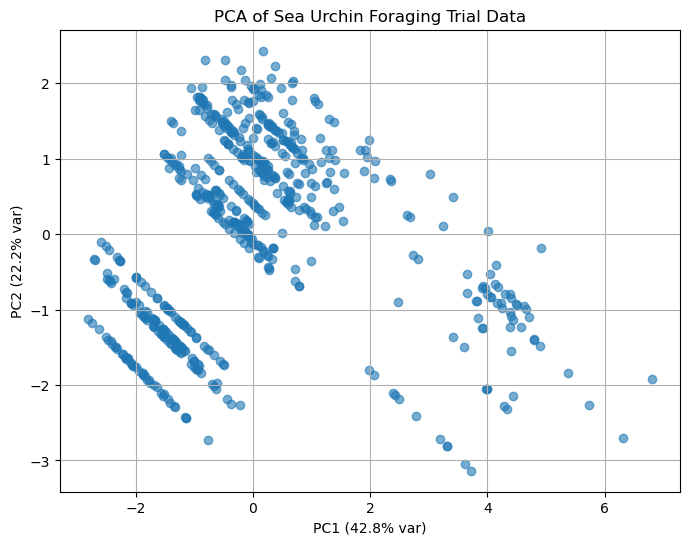

In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = "http://pasta.lternet.edu/package/data/eml/knb-lter-sbc/145/1/adddbb021b16819a5fbac2475b5478b9"
dt1 = pd.read_csv(url, skiprows=1, sep=",", quotechar='"', names=[
    "date", "trial_number", "p_r", "trial_id", "total_time", "tank",
    "urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality"
])

cols = ["urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality", "total_time"]
dt1_clean = dt1[cols].apply(pd.to_numeric, errors='coerce').dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(dt1_clean)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.6)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)")
plt.title("PCA of Sea Urchin Foraging Trial Data")
plt.grid(True)


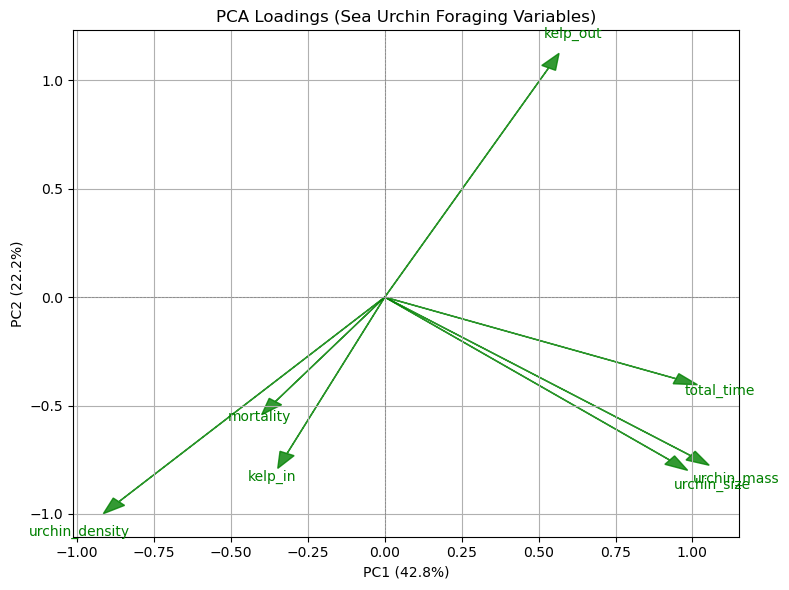

In [26]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


dt1 = pd.read_csv(url, skiprows=1, sep=",", quotechar='"', names=[
    "date", "trial_number", "p_r", "trial_id", "total_time", "tank",
    "urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality"
])

features = ["urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality", "total_time"]
X = dt1[features].apply(pd.to_numeric, errors='coerce').dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
loadings = pca.components_.T

fig, ax = plt.subplots(figsize=(8, 6))

for i, var in enumerate(features):
    ax.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
             color='green', alpha=0.8, head_width=0.05)
    ax.text(loadings[i, 0]*2.3, loadings[i, 1]*2.3, var, color='green', ha='center', va='center')


ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('PCA Loadings (Sea Urchin Foraging Variables)')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()



/var/folders/lv/kfk40qh52hg9rzk7z10471m40000gn/T/ipykernel_63611/1330395280.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dt1.groupby(['date', 'p_r'])['kelp_eaten'].mean().unstack()


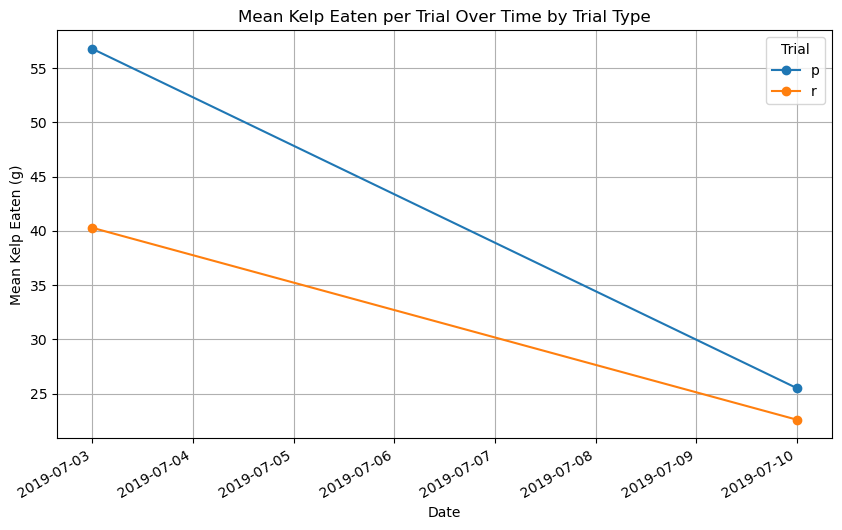

In [27]:
dt1 = pd.read_csv(url, skiprows=1, sep=",", quotechar='"', names=[
    "date", "trial_number", "p_r", "trial_id", "total_time", "tank",
    "urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality"
])

dt1['date'] = pd.to_datetime(dt1['date'], errors='coerce')
dt1['kelp_eaten'] = dt1['kelp_in'] - dt1['kelp_out']
dt1['p_r'] = dt1['p_r'].astype('category')

grouped = dt1.groupby(['date', 'p_r'])['kelp_eaten'].mean().unstack()

plt.figure(figsize=(10, 6))
grouped.plot(marker='o', linestyle='-', ax=plt.gca())
plt.title('Mean Kelp Eaten per Trial Over Time by Trial Type')
plt.xlabel('Date')
plt.ylabel('Mean Kelp Eaten (g)')
plt.grid(True)
plt.legend(title='Trial')


In [28]:
dt1 = pd.read_csv(url, skiprows=1, sep=",", quotechar='"', names=[
    "date", "trial_number", "p_r", "trial_id", "total_time", "tank",
    "urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality"
])

dt1['kelp_eaten'] = dt1['kelp_in'] - dt1['kelp_out']
dt1['density_bin'] = pd.qcut(dt1['urchin_density'], q=3, labels=["low", "medium", "high"])

dt1_clean = dt1.dropna(subset=['kelp_eaten', 'density_bin'])

model = smf.ols('kelp_eaten ~ C(density_bin)', data=dt1_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                       sum_sq     df           F        PR(>F)
C(density_bin)  380601.623570    2.0  314.961508  6.649372e-95
Residual        371585.087255  615.0         NaN           NaN


/var/folders/lv/kfk40qh52hg9rzk7z10471m40000gn/T/ipykernel_63611/3479327141.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dt1_clean.groupby('density_bin')['kelp_eaten']


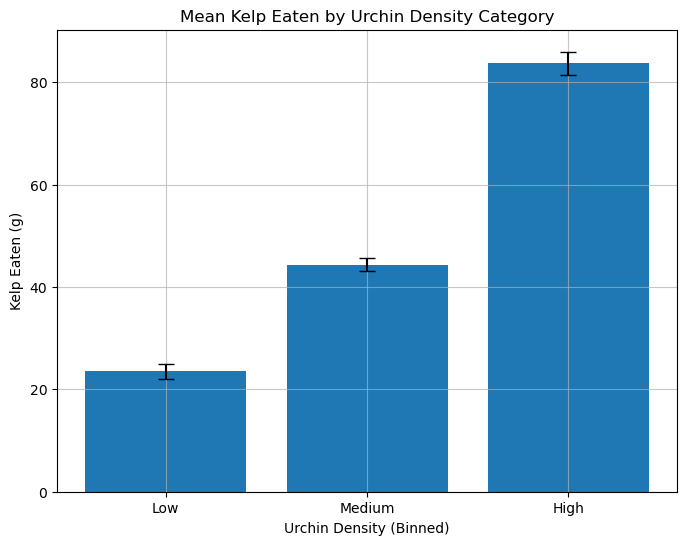

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm

dt1 = pd.read_csv(url, skiprows=1, sep=",", quotechar='"', names=[
    "date", "trial_number", "p_r", "trial_id", "total_time", "tank",
    "urchin_density", "urchin_size", "urchin_mass", "kelp_in", "kelp_out", "mortality"
])
dt1['kelp_eaten'] = dt1['kelp_in'] - dt1['kelp_out']
dt1['density_bin'] = pd.qcut(dt1['urchin_density'], q=3, labels=["Low", "Medium", "High"])
dt1_clean = dt1.dropna(subset=['kelp_eaten', 'density_bin'])

grouped = dt1_clean.groupby('density_bin')['kelp_eaten']
means = grouped.mean()
errors = grouped.apply(sem)




plt.figure(figsize=(8, 6))
bars = plt.bar(means.index, means.values, yerr=errors.values, capsize=6)


plt.title('Mean Kelp Eaten by Urchin Density Category')
plt.xlabel('Urchin Density (Binned)')
plt.ylabel('Kelp Eaten (g)')
plt.grid('True', alpha=0.7)

